In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from funcs.cleaning import clean

In [9]:
koi = pd.read_csv('../KOI.csv', index_col='kepid').sort_index()

In [11]:
system_id = koi.index.values[0]

In [12]:
# from os import listdir
# fnames = sorted(listdir('../fits/slc/'))
# fnames = [fname[14:31] for fname in fnames if (fname[4:13] == '{:09d}'.format(system_id))]
# data = Table.read('../fits/slc/kplr{:09d}-{}.fits'.format(system_id, fnames[0]))['TIME','PDCSAP_FLUX','PDCSAP_FLUX_ERR']
# time = data['TIME']
# flux = data['PDCSAP_FLUX']
# fluxerr = data['PDCSAP_FLUX_ERR']
# # np.nanmean(data['PDCSAP_FLUX'])
# plt.figure(figsize=(20,10))
# plt.errorbar(time[:10], flux[:10], yerr=fluxerr[:10], lw=0.1)

In [13]:
a = clean(system_id, koi, lc_index=1, slc_or_llc='llc')

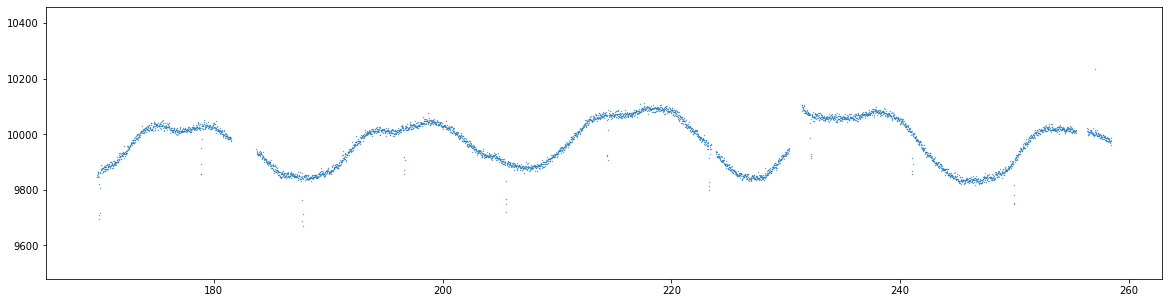

In [14]:
a.clean_arrays()
a.plot()

In [15]:
a.remove_stellar_activity()

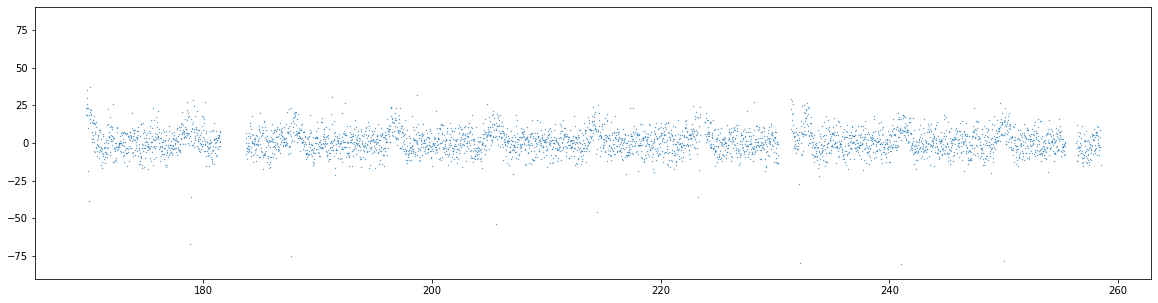

In [16]:
a.plot()

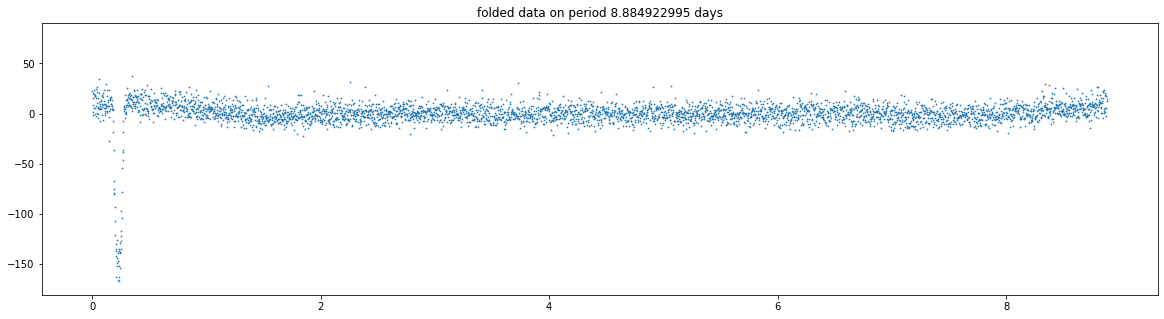

In [17]:
a.fold(plot=True, apply_fold=True)

# Implement transformer

##### AUTOBOTS, ROLL OUT

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [19]:
# set up our transformer. d_model=E (see below)
transformer_model = nn.Transformer(d_model=2, nhead=1, num_encoder_layers=12)

Inputs of nn.Transformer:
- d_model – the number of expected features in the encoder/decoder inputs (default=512).
- nhead – the number of heads in the multiheadattention models (default=8).
- num_encoder_layers – the number of sub-encoder-layers in the encoder (default=6).
- num_decoder_layers – the number of sub-decoder-layers in the decoder (default=6).
- dim_feedforward – the dimension of the feedforward network model (default=2048).
- dropout – the dropout value (default=0.1).
- activation – the activation function of encoder/decoder intermediate layer, relu or gelu (default=relu).
- custom_encoder – custom encoder (default=None).
- custom_decoder – custom decoder (default=None).

The transformer model expects an input shape of (S, N, E) where <br>
>S: Source sequence length (ie number of datapoints in the lightcurve) <br>
>N: batch size <br>
>E: number of features in our dataset. I think this should be 2 (flux and time) <br>

The output shape is (T, N, E) where <br>
>T: Target output shape. In our case this should be 1 (single number corresponding to probability of presence of planet)

___

Here I make a sample of input data of two identical lightcurves with 4070 datapoints each. Use torch.tensor so that it can be accepted by the network (analagous to np.array)

In [20]:
src = torch.tensor(np.array([np.array([a.time, a.flux]), np.array([a.time, a.flux])], dtype='float32').T)

In [21]:
# check the shape is ok
src.shape

torch.Size([4070, 2, 2])

In [22]:
tgt = torch.rand((1, 2, 2))

In [23]:
out = transformer_model(src,tgt)
# wahoo! this runs fine so our shapes are good

In [24]:
# weirdly, the target output shape has 4 numbers (because shape is (1, 2, 2)) but we should only have 2 numbers since we have 2 lightcurves.
# but transformer_model kicks up an error if I try to have tgt = torch.rand((1, 2, 1)) :(

In [25]:
tgt

tensor([[[0.9572, 0.9044],
         [0.2659, 0.6652]]])

In [29]:
out.train

AttributeError: 'Tensor' object has no attribute 'train'